# eda
---
* carson dahlberg, 2020-04-05
> Remember, finding a dataset of interest and exploring it is most of your job for Week 9!  So expect this to take some time - and that's both perfectly normal and completely okay.

## Week 9
__Step 1: Find a dataset or datasets__
Based on your interest, identify a dataset which you will want to examine.  There is a reading this week on where you can find open datasets, but feel free to use other datasets you have access to and care publicly share results about.  Or, feel free to create your own dataset by getting data from the web using tools you learned in Week 8.

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.  Feel free to use a combination of datasets which you can merge in some meaningful way.

__Step 2:  Explore the dataset(s)__
In this step, you should explore what is present in the data and how the data is organized.  If using multiple datasets, you’ll need to determine what common features allow you to merge the datasets.  You’ll want to answer the following questions:

Are there quality issues in the dataset (noisy, missing data, etc.)?
What will you need to do to clean and/or transform the raw data for analysis?

__Step 3:  Identify 1-3 research questions__
Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

Good (just right):  Can you use sentiment analysis on comments about movies on Twitter to predict its box office earnings?  If you have, or can obtain, tweets which refer to a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Step 4:  Describe your dataset(s) and your research question(s) at the end of Week 9 in the Project.__

Checkpoint. 


## table of contents
- get the data
- examine the data
- ideation
- potential questions / issues / limitations

### ideation

$\text{influence} = \frac{\text{# of followers}}{\text{# of following + 1}}$

display an incluencer's most recent tweets

search for a list of terms, analyze results, find hot topics with time and names $\rightarrow$ keywords

- q1 What groups and content themes?
- q2 which topics get coverage from the media?
- q3 which topics contain content for awareness and education?
- q4 which type of tweeters participate?
- q5 in general, how does the media react (sentiment)?
- q6 what do personal tweets expressed?
- q7 who are the influencers? their sentiment and recent tweets?
- q8 how do ml algos affect the groups, themes, topics, etc?
- q9 can context be added to a tweet?
- q10 how to compare topics/subtopics?

## [get the data - processing code](https://github.com/thepanacealab/covid19_twitter/blob/master/processing_code/README.md)

The order of processing goes:

1. Extract JSON from hydrated tweets with: parse_json_extreme.py. If you want cleant tweets (no RTs) use parse_json_extreme_clean.py
1. Apply get_1grams.py to the parsed TSV files to get the term frequencies.
1. Apply get_ngrams.py to the parsed TSV files to get the bigrams and trigrams.
1. Combine all 1grams generated from each TSV file with combine1grams.py.
1. Combine all ngrams generated from each TSV file with combineNgrams.py.

These steps should be enough parse the hydrated JSON tweet files and calculate the ngrams.


## data issues
* with top 1000 terms, there were NaNs for some terms and the freqs were significant (sometimes the leading term)
* for trigrams there are bad terms like 
  * `href rel nofollow`: 1959, 2020-03-22, trigrams
  * `true href rel`: 1913. 2020-03-22, trigrams
* 

In [97]:
import pandas as pd
import numpy as np
from pathlib import Path

# stopwords 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
print(ENGLISH_STOP_WORDS)

frozenset({'per', 'almost', 'seems', 'former', 'none', 'because', 'once', 'his', 'other', 'nevertheless', 'been', 'although', 'hundred', 'mine', 'everything', 'noone', 'than', 'third', 'along', 'very', 'co', 'last', 'toward', 'that', 'out', 'any', 'wherever', 'him', 'whoever', 'whereas', 'would', 'own', 'formerly', 'someone', 'myself', 'our', 'further', 'beside', 'me', 'ten', 'others', 'well', 'becomes', 'about', 'down', 'fifteen', 'least', 'beyond', 'they', 'too', 'thereupon', 'some', 'eight', 'never', 'became', 'both', 'mill', 'many', 'whereby', 'made', 'where', 'part', 'everyone', 'amoungst', 'next', 'yet', 'thence', 'until', 'such', 'these', 'while', 'will', 'fire', 'perhaps', 'and', 'on', 'anyway', 'your', 'though', 'move', 'latter', 'so', 'front', 'nowhere', 'two', 'thus', 'then', 'whether', 'during', 'whom', 'seeming', 'as', 'before', 'or', 'empty', 'after', 'anyhow', 'only', 'against', 'not', 'up', 'hence', 'cry', 'them', 'nor', 'less', 'bottom', 'else', 'sometimes', 'afterward

In [4]:
!ls ../covid19_twitter

README.md  dailies  processing_code  version1.0


In [44]:
DATA = Path('../covid19_twitter/dailies')
files = list(DATA.rglob('*/*'))

In [154]:
# terms
terms = [f for f in files if 'top1000terms' in str(f)]
terms_frames = []
for t in terms:
    df = pd.read_csv(t, names=['term','freq'])
    df['date'] = pd.to_datetime(str(t).split('/')[-2])
    terms_frames.append(df)

# concat dfs
df_terms = pd.concat(terms_frames, axis=0).dropna()
df_terms.head()

,term,freq,date
0,coronavirus,223843,2020-03-22
2,covid,67037,2020-03-22
3,19,64625,2020-03-22
4,covid19,56389,2020-03-22
5,people,28026,2020-03-22


In [155]:
df_terms[df_terms['term'].str.contains('ap')]['term'].unique()

array(['app', 'happy', 'happen', 'paper', 'happening', 'whatsapp',
       'april', 'japan', 'happened', 'aprilfoolsday', 'captain', 'setiap',
       'siap', 'dapat', 'tetap'], dtype=object)

## analyze top 1000 terms
* what are the unique terms?
* what are the themes and groups?

Observations:
- unfortunately stopwords are in there like `the`, some other langs like `du`, `et`, `il`, `sa`, `casos`, etc...
- interesting `world` groups by country `china`, `italy`, `us`/`america`/`usa` and `uk`, `france`, `brasil`, `iran`, `spain`, `korea`, `colombia`, `australia`, 'venezuela', 'russia', 'chile', 'africa'
- versions of covid-19 
- themes: 
  * masks, masques, wearing, spread
  * lockdown, lockdownnow , shutdown, restrictions, orders, confinement, measures
  * die, death
  * stayathome, stayhome, distancing, quaratinelife
  * hospital, health, healthcare 
- news media: ['fox', 'foxnews', 'msnbc', 'cnn', 'times', 'youtube', 'whatsapp', 'twitter', 'nytimes', ]

In [119]:
# potential keywords...
terms_unique = [t for t in df_terms['term'].unique().tolist() if (pd.isna(t) == False)]
print(f'{len(terms_unique)} unique top 1000 terms INCLUDING ENGLISH_STOP_WORDS.')

# remove stopwords
terms_unique = [t for t in terms_unique if t not in ENGLISH_STOP_WORDS]
print(f'{len(terms_unique)} unique top 1000 terms AFTER removing ENGLISH_STOP_WORDS.')
#print(terms_unique)
covid = [t for t in terms_unique if ('covid' in t) | ('corona' in t)]
covid


1579 unique top 1000 terms INCLUDING ENGLISH_STOP_WORDS.
1455 unique top 1000 terms AFTER removing ENGLISH_STOP_WORDS.


['coronavirus',
 'covid',
 'covid19',
 'covidー19',
 'coronaviruspandemic',
 'corona',
 'covid_19',
 'covidiot',
 'coronavírus',
 'covid19outbreak',
 'coronaupdatesinindia',
 'covidiots',
 'covid_19india',
 'coronavid19',
 'coronav',
 'putusrantaicovid19',
 'coronaviruslockdown',
 'covid2019',
 'covididiots',
 'bubarkancegahcorona',
 'covid19out',
 'coronavirusoutbreak',
 'coronavillains',
 'coronavirusoubreak',
 'coronavirusindia',
 'coronalockdown',
 'aksiberantascovid19',
 'coronaupdate',
 'coronavirusupdate',
 'indiafightscorona',
 'coronavirustruth',
 'sinergitascegahcovid19',
 'jatenglawancorona',
 'coronavirusupdates',
 'covid19pandemic',
 'optimiscegahcovid19',
 'ayobijakcegahcorona',
 'coronabisadisembuhkan']

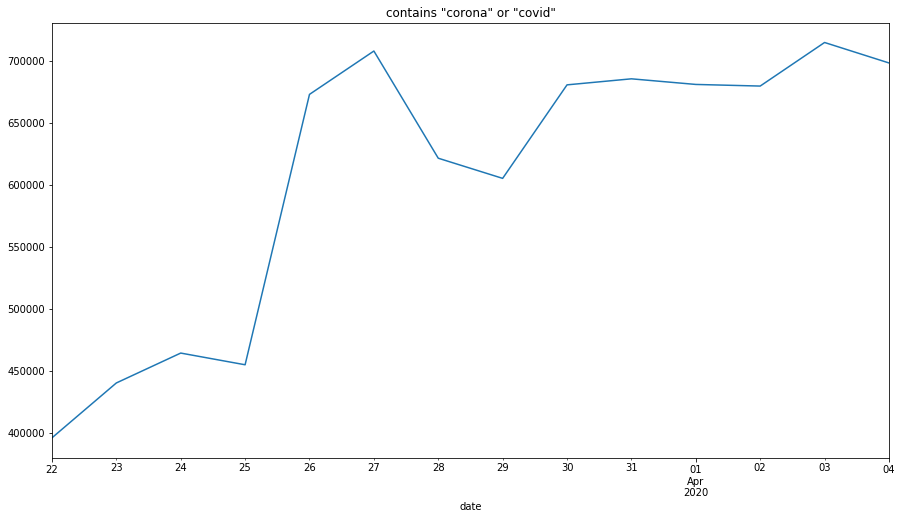

In [140]:
# plot corona/covid
df_terms[df_terms['term'].str.contains('|'.join(covid))][['freq','date']]\
                         .groupby('date')['freq'].sum()\
                         .plot(figsize=(15,8), title='contains "corona" or "covid"')

#### look at the news / media

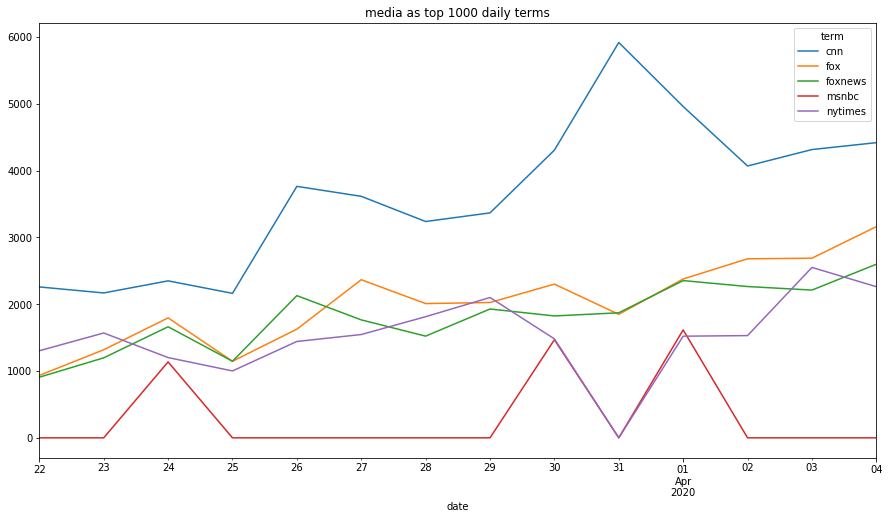

In [180]:
media = ['fox', 'foxnews', 'msnbc', 'cnn', 'nytimes'] #'times', 'whatsapp', 'youtube', 'twitter', 'times'
df_media = df_terms[df_terms['term'].str.contains('|'.join(media))].copy()
df_media.groupby(['date','term'])['freq'].sum()\
                                         .unstack()\
                                         .fillna(0)\
                                         .plot(figsize=(15,8), title='media as top 1000 daily terms')

## analyze the top 1000 b-grams & tri-grams

In [185]:
# terms
ngrams = [f for f in files if 'grams' in str(f)]
ngrams_frames = []
for t in ngrams:
    df = pd.read_csv(t)
    df['date'] = pd.to_datetime(str(t).split('/')[-2])
    df['ngram'] = str(t).split('top1000')[-1].replace('.csv','')
    ngrams_frames.append(df)

# concat dfs
df_ngrams = pd.concat(ngrams_frames, axis=0).dropna()
df_ngrams.head()

,gram,counts,date,ngram
0,covid 19,63056,2020-03-22,bigrams
1,stay home,4573,2020-03-22,bigrams
2,positive coronavirus,4439,2020-03-22,bigrams
3,trying times,4334,2020-03-22,bigrams
4,coronavirus pandemic,4321,2020-03-22,bigrams


In [184]:
# the most
df_ngrams[df_ngrams['ngram'] == 'trigrams'].sort_values(['date','counts'], ascending=[True, False])

,gram,counts,date,ngram
0,trying times share,4249,2020-03-22,trigrams
1,italy trying times,4229,2020-03-22,trigrams
2,stand italy trying,4228,2020-03-22,trigrams
3,times share support,4223,2020-03-22,trigrams
4,share support italian,4217,2020-03-22,trigrams
...,...,...,...,...
0,covid 19 pandemic,4438,2020-04-04,trigrams
1,covid 19 coronabisadisembuhkan,4287,2020-04-04,trigrams
2,korban covid 19,2811,2020-04-04,trigrams
3,covid 19 dapat,2774,2020-04-04,trigrams


In [199]:
# for i in ngrams_frames:
#     display(i.head(10))

['social distancing', 'social distance', 'practice social distancing', 'coronavirus social distancing', 'social distancing advice', 'practicing social distancing', 'social distancing coronavirus', 'social distancing self', 'social distancing measures', 'social distancing re', 'social distancing rules', 'social distancing guidelines', 'extends social distancing', 'federal social distancing']


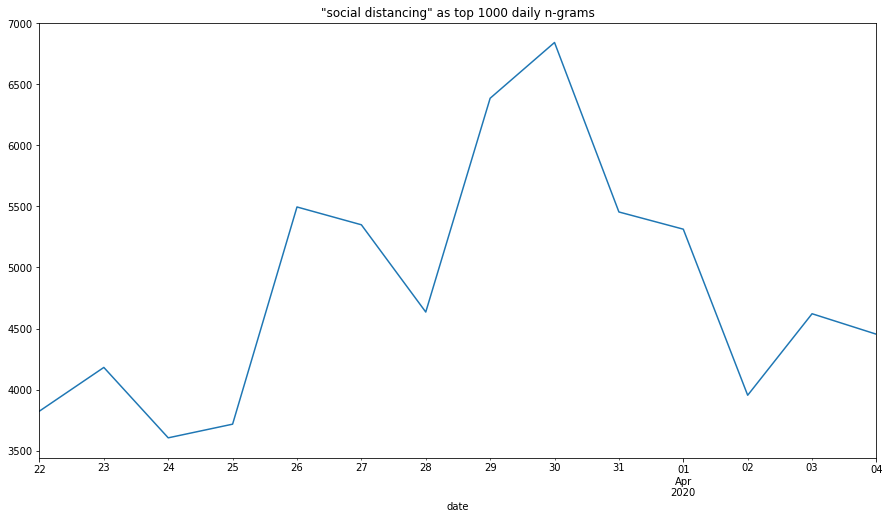

In [200]:
# "social" distancing
print(df_ngrams[df_ngrams['gram'].str.contains('social dis')]['gram'].unique().tolist())
df_ngrams[df_ngrams['gram'].str.contains('social dis')].groupby(['date'])['counts'].sum().plot(figsize=(15,8), title='"social distancing" as top 1000 daily n-grams')

In [ ]:
# stay home, safe, etc.

## 